In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
stock_data = yf.download('TCS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('LT.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('HCL',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('WIPRO.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('TECHM.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('REDINGTON.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('ITC',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('CYIENT.NS',start='2012-01-01',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [5]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 30, epochs=25)

Epoch 1/25
60/60 [==============================] - 8s 67ms/step - loss: 0.0028
Epoch 2/25
60/60 [==============================] - 4s 64ms/step - loss: 4.9431e-04
Epoch 3/25
60/60 [==============================] - 4s 65ms/step - loss: 5.2771e-04
Epoch 4/25
60/60 [==============================] - 4s 66ms/step - loss: 3.9466e-04
Epoch 5/25
60/60 [==============================] - 4s 65ms/step - loss: 3.6043e-04
Epoch 6/25
60/60 [==============================] - 4s 65ms/step - loss: 3.8191e-04
Epoch 7/25
60/60 [==============================] - 4s 66ms/step - loss: 3.2622e-04
Epoch 8/25
60/60 [==============================] - 4s 66ms/step - loss: 2.6971e-04
Epoch 9/25
60/60 [==============================] - 4s 64ms/step - loss: 3.0519e-04
Epoch 10/25
60/60 [==============================] - 4s 64ms/step - loss: 2.7772e-04
Epoch 11/25
60/60 [==============================] - 4s 65ms/step - loss: 3.0841e-04
Epoch 12/25
60/60 [==============================] - 4s 64ms/step - loss: 2.82

In [13]:
predict=model.predict(x_train)

56/56 [==============================] - 1s 22ms/step


In [15]:
predict=scaler.inverse_transform(predict)

In [7]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

15/15 [==============================] - 1s 20ms/step


0.13159213097131692

<AxesSubplot:xlabel='Date'>

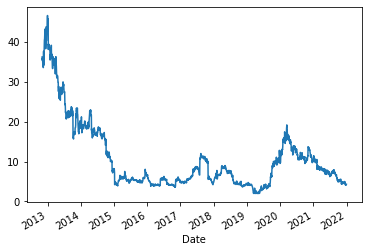

In [8]:
close_prices.plot()